<a href="https://www.kaggle.com/code/siddp6/simple-skip-connection?scriptVersionId=138509898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Imports

In [1]:
import utility

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Initalisation

In [3]:
input_size, hidden_size, output_size = 512, 128, 32
num_samples = 100000
epochs = 100
input_data = torch.rand(num_samples, input_size)
target_data = torch.rand(num_samples, output_size)
loss_normal_3, loss_normal_6 = list(), list()
loss_skip_3, loss_skip_6 = list(), list()

# Normal Model (3 layered) (without skip-connection)

In [4]:
class NormalNet3(nn.Module):
    def __init__(self, input_size, output_size):
        super(NormalNet3, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X))
        
        X = self.relu(X)
        
        return X

In [5]:
normal_model_3 = NormalNet3(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(normal_model_3.parameters(), lr=.01)

In [6]:
loss_normal_3 = utility.train_model(normal_model_3, epochs, input_data, target_data, criterion, optimizer, 5)

Epoch [5/100], Loss: 0.3020
Epoch [10/100], Loss: 0.2990
Epoch [15/100], Loss: 0.2959
Epoch [20/100], Loss: 0.2926
Epoch [25/100], Loss: 0.2891
Epoch [30/100], Loss: 0.2855
Epoch [35/100], Loss: 0.2818
Epoch [40/100], Loss: 0.2779
Epoch [45/100], Loss: 0.2739
Epoch [50/100], Loss: 0.2699
Epoch [55/100], Loss: 0.2658
Epoch [60/100], Loss: 0.2617
Epoch [65/100], Loss: 0.2576
Epoch [70/100], Loss: 0.2535
Epoch [75/100], Loss: 0.2494
Epoch [80/100], Loss: 0.2454
Epoch [85/100], Loss: 0.2413
Epoch [90/100], Loss: 0.2374
Epoch [95/100], Loss: 0.2335
Epoch [100/100], Loss: 0.2296


# Normal Model (7 layered) (without skip-connection)

In [7]:
class NormalNet7(nn.Module):
    def __init__(self, input_size, output_size):
        super(NormalNet7, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)        
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, hidden_size)
        self.layer_4 = nn.Linear(hidden_size, hidden_size)
        self.layer_5 = nn.Linear(hidden_size, hidden_size)
        self.layer_6 = nn.Linear(hidden_size, hidden_size)
        self.layer_7 = nn.Linear(hidden_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X)) 
        X = self.relu(self.layer_4(X)) 
        X = self.relu(self.layer_5(X)) 
        X = self.relu(self.layer_6(X)) 
        X = self.relu(self.layer_7(X)) 
        
        X = self.relu(X)
        
        return X

In [8]:
normal_model_7 = NormalNet7(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(normal_model_7.parameters(), lr=.01)

In [9]:
loss_normal_7 = utility.train_model(normal_model_7, epochs, input_data, target_data, criterion, optimizer, 5)

Epoch [5/100], Loss: 0.3155
Epoch [10/100], Loss: 0.3146
Epoch [15/100], Loss: 0.3138
Epoch [20/100], Loss: 0.3129
Epoch [25/100], Loss: 0.3120
Epoch [30/100], Loss: 0.3111
Epoch [35/100], Loss: 0.3102
Epoch [40/100], Loss: 0.3094
Epoch [45/100], Loss: 0.3085
Epoch [50/100], Loss: 0.3077
Epoch [55/100], Loss: 0.3069
Epoch [60/100], Loss: 0.3060
Epoch [65/100], Loss: 0.3052
Epoch [70/100], Loss: 0.3044
Epoch [75/100], Loss: 0.3036
Epoch [80/100], Loss: 0.3028
Epoch [85/100], Loss: 0.3020
Epoch [90/100], Loss: 0.3012
Epoch [95/100], Loss: 0.3004
Epoch [100/100], Loss: 0.2996


# Skip Model (3 layered) (with skip-connection)

In [10]:
class SkipNet3(nn.Module):
    def __init__(self, input_size, output_size):
        super(SkipNet3, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, output_size)
        
        self.skip_layer = nn.Linear(input_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        skip_connection = self.skip_layer(X)
        
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X))
        
        X = self.relu(X + skip_connection)
        
        return X

In [11]:
skip_model_3 = SkipNet3(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(skip_model_3.parameters(), lr=.01)

In [12]:
loss_skip_3 = utility.train_model(skip_model_3, epochs, input_data, target_data, criterion, optimizer, 5)

Epoch [5/100], Loss: 0.2070
Epoch [10/100], Loss: 0.1847
Epoch [15/100], Loss: 0.1678
Epoch [20/100], Loss: 0.1561
Epoch [25/100], Loss: 0.1479
Epoch [30/100], Loss: 0.1420
Epoch [35/100], Loss: 0.1378
Epoch [40/100], Loss: 0.1351
Epoch [45/100], Loss: 0.1336
Epoch [50/100], Loss: 0.1328
Epoch [55/100], Loss: 0.1324
Epoch [60/100], Loss: 0.1323
Epoch [65/100], Loss: 0.1322
Epoch [70/100], Loss: 0.1321
Epoch [75/100], Loss: 0.1320
Epoch [80/100], Loss: 0.1320
Epoch [85/100], Loss: 0.1319
Epoch [90/100], Loss: 0.1317
Epoch [95/100], Loss: 0.1315
Epoch [100/100], Loss: 0.1312


# Skip Model (7 layered) (with skip-connection)

In [13]:
class SkipNet7(nn.Module):
    def __init__(self, input_size, output_size):
        super(SkipNet7, self).__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)        
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_3 = nn.Linear(hidden_size, hidden_size)
        self.layer_4 = nn.Linear(hidden_size, hidden_size)
        self.layer_5 = nn.Linear(hidden_size, hidden_size)
        self.layer_6 = nn.Linear(hidden_size, hidden_size)
        self.layer_7 = nn.Linear(hidden_size, output_size)
        
        self.skip_layer = nn.Linear(input_size, output_size)
        
        self.relu = nn.ReLU()
        
    def forward(self, X):
        skip_connection = self.skip_layer(X)
            
        X = self.relu(self.layer_1(X))
        X = self.relu(self.layer_2(X))
        X = self.relu(self.layer_3(X)) 
        X = self.relu(self.layer_4(X)) 
        X = self.relu(self.layer_5(X)) 
        X = self.relu(self.layer_6(X)) 
        X = self.relu(self.layer_7(X)) 
        
        X = self.relu(X + skip_connection)
        
        return X

In [14]:
skip_model_7 = SkipNet7(input_size, output_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(skip_model_7.parameters(), lr=.01)

In [15]:
loss_skip_7 = utility.train_model(skip_model_7, epochs, input_data, target_data, criterion, optimizer, 5)

Epoch [5/100], Loss: 0.2549
Epoch [10/100], Loss: 0.2370
Epoch [15/100], Loss: 0.2218
Epoch [20/100], Loss: 0.2097
Epoch [25/100], Loss: 0.1994
Epoch [30/100], Loss: 0.1897
Epoch [35/100], Loss: 0.1808
Epoch [40/100], Loss: 0.1736
Epoch [45/100], Loss: 0.1686
Epoch [50/100], Loss: 0.1650
Epoch [55/100], Loss: 0.1626
Epoch [60/100], Loss: 0.1611
Epoch [65/100], Loss: 0.1603
Epoch [70/100], Loss: 0.1599
Epoch [75/100], Loss: 0.1597
Epoch [80/100], Loss: 0.1595
Epoch [85/100], Loss: 0.1594
Epoch [90/100], Loss: 0.1591
Epoch [95/100], Loss: 0.1588
Epoch [100/100], Loss: 0.1581


# Analysis

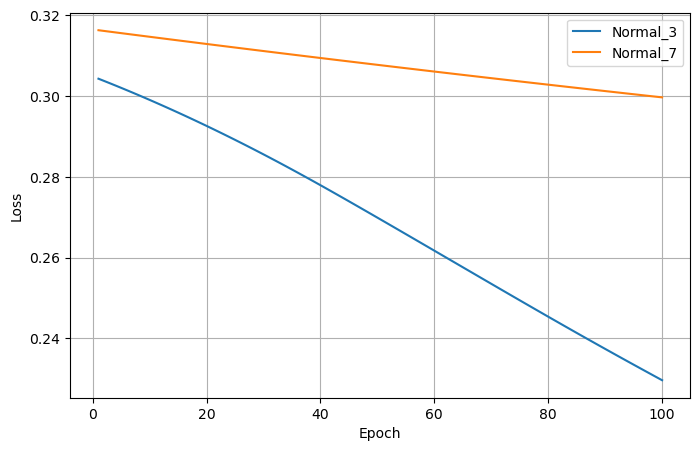

In [16]:
utility.plot_loss({"Normal_3": loss_normal_3, "Normal_7": loss_normal_7}, epochs)

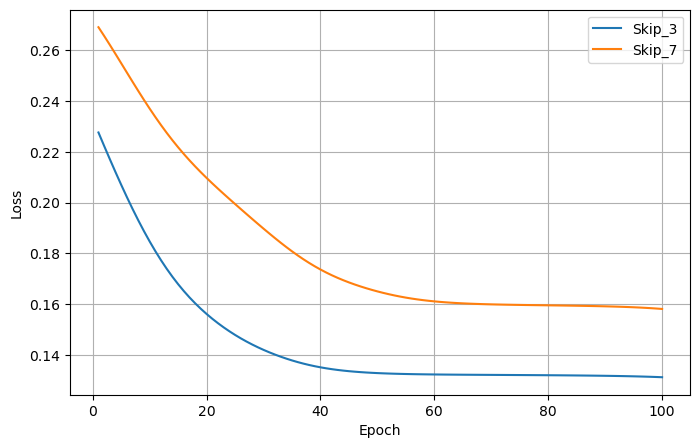

In [17]:
utility.plot_loss({"Skip_3": loss_skip_3, "Skip_7": loss_skip_7}, epochs)